# Terrain Analysis & Hydrologic Modelling
## Assignment (10/16)
### Quiz 1: Introduce an example on matplotlib gallery
[3D surface (colormap)](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py)

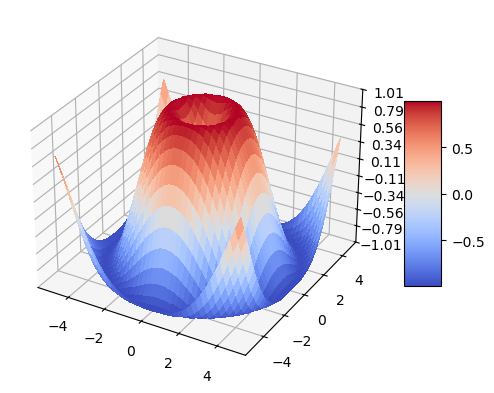

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X0 = np.arange(-5, 5, 0.25)
Y0 = np.arange(-5, 5, 0.25)
X0, Y0 = np.meshgrid(X0, Y0)
R = np.sqrt(X0**2 + Y0**2)
Z0 = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X0, Y0, Z0, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Replacing data with DEM

In [2]:
import rasterio

X, Y, Z = (0, 0, 0)

with rasterio.open('..\src\Sample.tif') as f:

    # Read the first band (I already confirmed that there is only one band in the data)
    data = f.read(1)

    # Get the coordinates of each pixels (EPSG: 32651 - WGS84 / UTM zone 51N)
    # Note the change from (R, C) to (C, R)
    row, col = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
    X, Y = rasterio.transform.xy(f.transform, col, row)
    Z = np.array(data)

X = np.reshape(X, Z.shape)
Y = np.reshape(Y, Z.shape)

# Subtract the minimum
X = (X - np.min(X)) / 1000
Y = (Y - np.min(Y)) / 1000

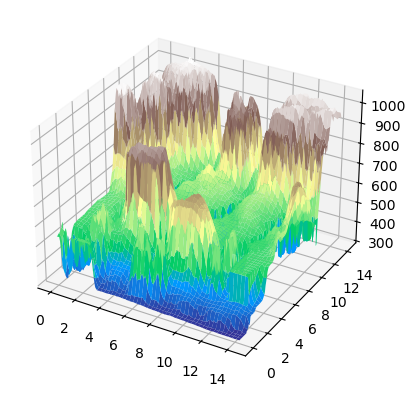

In [3]:
# The rest is almost the same as above
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.terrain,
                    linewidth=0, antialiased=True)

# Plot the 3D graph
plt.show()

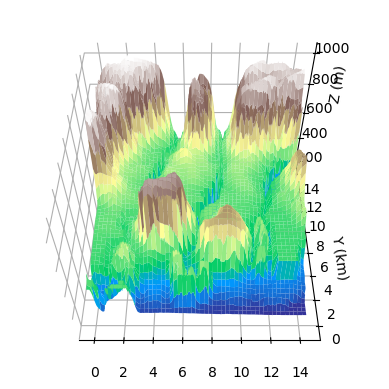

In [4]:
# Other useful customizations

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.terrain,
                    linewidth=0, antialiased=True)

# Field of view (FOV)
ax.set_proj_type('persp', focal_length=0.3)

# View angles
ax.view_init(azim=-90, elev=50)

# Axis label
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (m)')

# Manually set axis ticks
ax.zaxis.set_ticks(np.arange(200, 1200, 200))

# Remove background
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()

Source: https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html
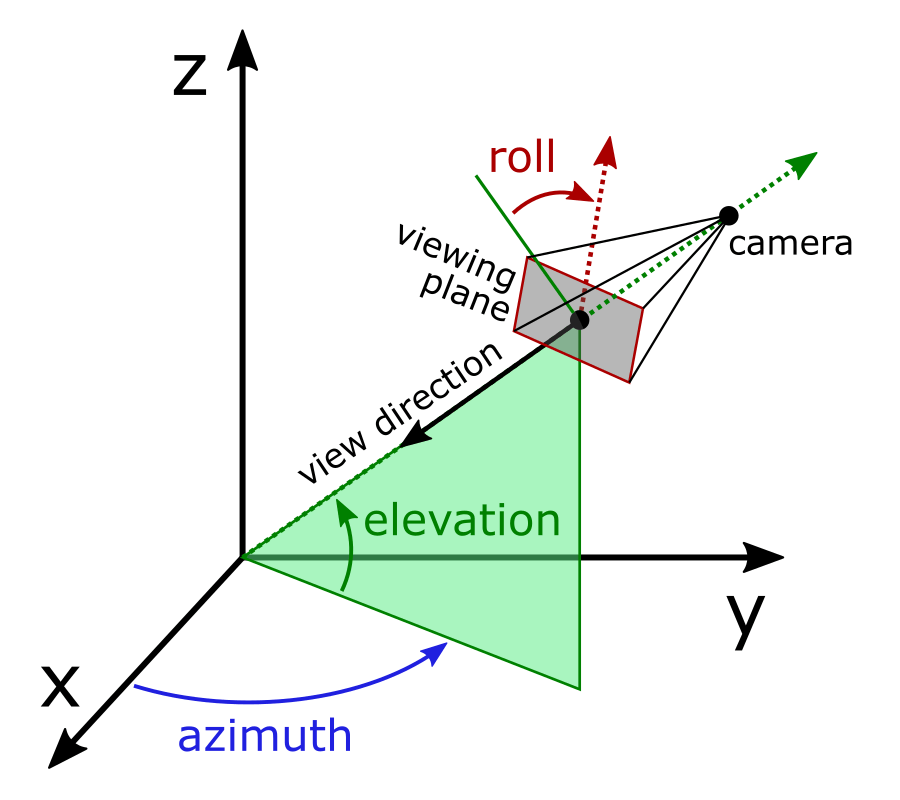